# Sales Prediction Using Python

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Build a model which predicts sales based on the money spent on different platforms for marketing.

## Reading the dataset

In [3]:
sales =pd.read_csv('advertising (1).csv')

In [4]:
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Exploratory data analysis

In [5]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
percent=(sales.isnull().sum()/sales.isnull().count())*100
percent

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

In [8]:
sales['Sales'].value_counts()

Sales
11.9    5
16.7    5
20.7    4
11.0    3
11.3    3
       ..
13.4    1
24.2    1
8.1     1
5.5     1
25.5    1
Name: count, Length: 121, dtype: int64

In [9]:
sales['Sales'].unique()

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 17.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 16.1, 10.6, 23.2,
       19.8, 16.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1,
       24.2, 14. , 16. , 11. , 13.4, 22.3, 18.3, 12.4,  8.8,  8.7,  6.9,
       14.2,  5.3, 17.3, 13.6, 21.7, 12.9, 16.7,  7.3, 19.4, 22.2, 11.5,
       16.9, 17.2, 19.7, 21.8, 12.2,  9.4, 15.9,  6.6, 15.5,  7. , 15.2,
       24.7,  1.6, 17.7,  5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 10.9,
       19.2, 20.1, 12.3, 10.3, 18.2, 20.6,  3.2, 15.3, 13.3, 19.9,  8. ,
       20. ,  8.4,  7.6, 27. , 16.8, 17.6, 26.2,  6.7,  5.9, 14.8, 25.5])

In [10]:
#There is no null value now we do EDA

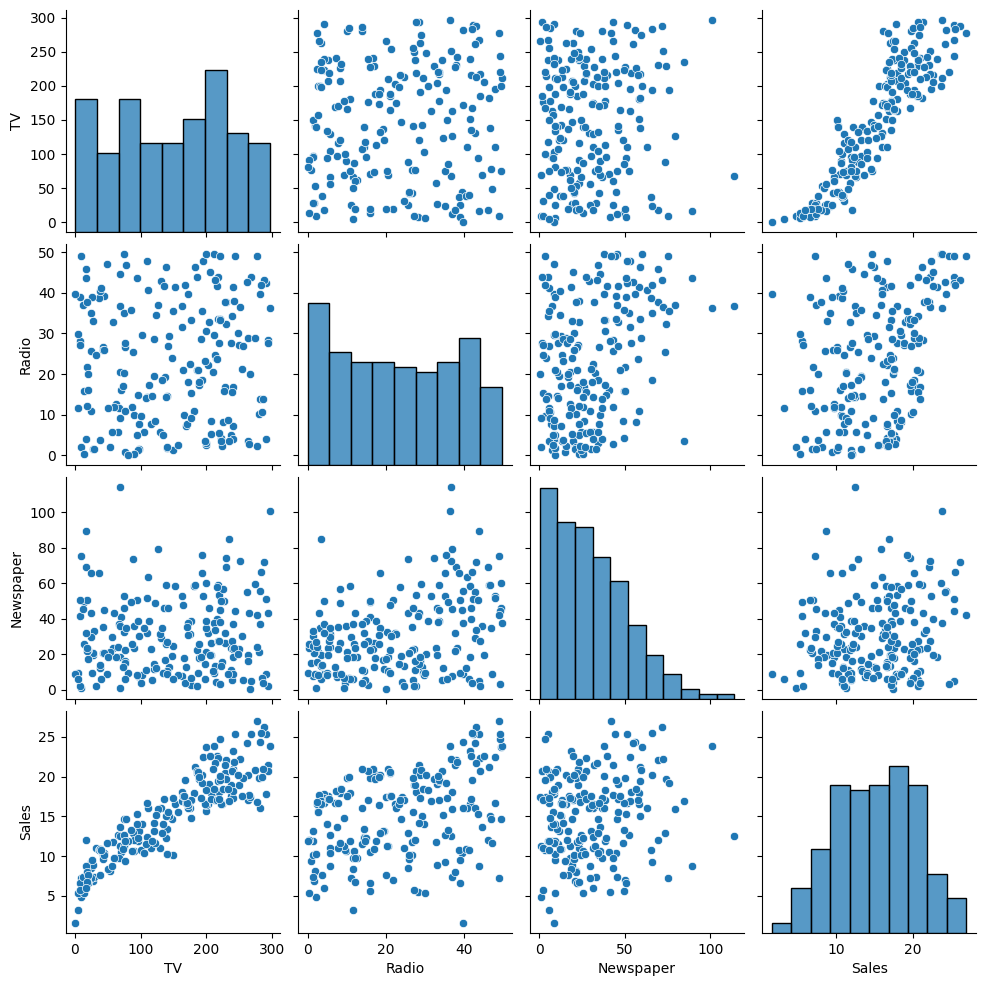

In [11]:
sns.pairplot(sales)
plt.show()

In [12]:
corr_Matrix=sales.corr()
corr_Matrix['Sales'].sort_values(ascending=False)

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64

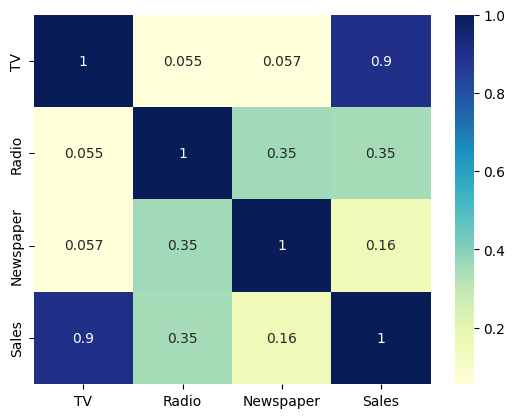

In [13]:
sns.heatmap(sales.corr(), cmap="YlGnBu",annot=True)
plt.show()

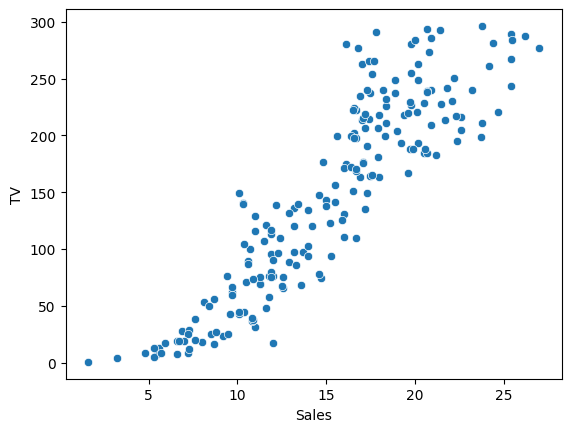

In [14]:
sns.scatterplot(x='Sales',y='TV',data=sales)
plt.show()

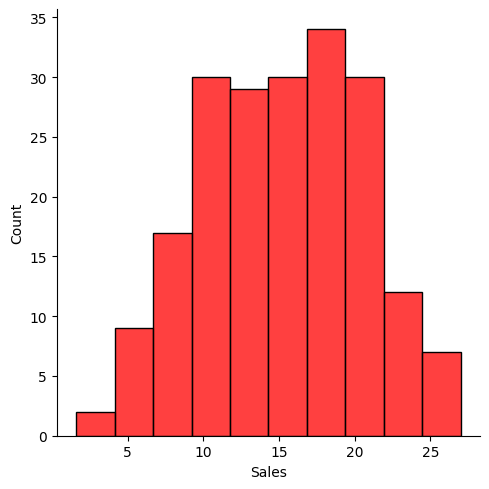

In [15]:
sns.displot(sales['Sales'],color='red')
plt.show()

In [16]:
#for outliers we use boxplot

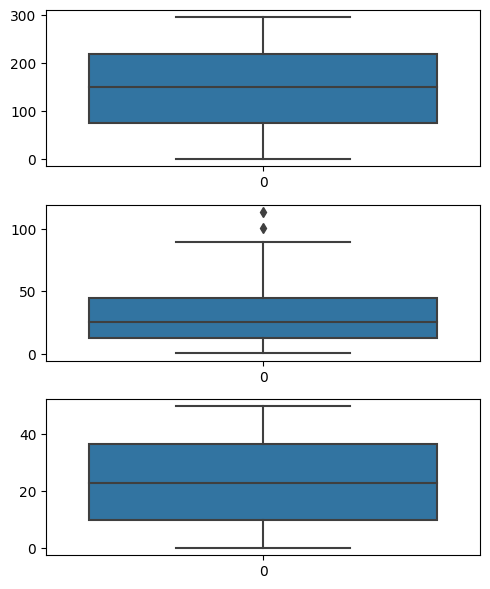

In [17]:
fig, axs = plt.subplots(3, figsize = (5,6))
plt1 = sns.boxplot(sales['TV'], ax = axs[0])
plt2 = sns.boxplot(sales['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(sales['Radio'], ax = axs[2])
plt.tight_layout()

# Splitting the dataset

In [18]:
x=sales.drop(['Sales'],axis=1)
y=sales['Sales']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Model Building

In [21]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
predictions=model.predict(x_test)
predictions

array([17.15991908, 20.53369503, 23.68914396,  9.5191455 , 21.60736836,
       12.78101318, 21.08636345,  8.76054246, 17.11499951, 16.68789636,
        8.97584663,  8.57645026, 18.33212325,  8.17863567, 12.64605571,
       14.94486946,  8.34939536, 17.83858948, 11.12172174, 20.37740648,
       20.9483297 , 13.04035779, 11.01360656, 22.51142595,  9.40369784,
        7.98591291, 20.86943368, 13.77882255, 10.83407064,  8.00419229,
       15.88597618, 10.7027424 , 20.9521718 , 10.84679243, 21.50720813,
       21.07347295, 12.22673775, 22.85273767, 12.57698182,  6.54597206,
       11.93411853, 15.23490068, 10.07411153,  9.52159696, 17.11786382,
        7.28032677, 10.49404864, 15.24356754, 11.20742176, 11.78392665,
       14.01472163, 14.59884572, 10.82722434,  9.55839415,  9.03749681,
       12.51183313, 10.52551021, 25.01900824,  7.99334943, 15.73916263])

In [22]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions)
rmse=np.sqrt(mse)

# Mse and rmse score of linear model

In [23]:
mse , rmse

(2.541624036229149, 1.5942471691143594)

In [24]:
from sklearn.tree import DecisionTreeRegressor
model1=DecisionTreeRegressor()
model1.fit(x_train,y_train)
predictions=model1.predict(x_test)
predictions   

array([18. , 23.8, 19.6,  5.6, 23.8, 15.3, 22.6,  9.6, 17.8, 17.1,  8.5,
        9.7, 16.7,  3.2, 13.2, 17.9,  5.6, 17.3, 11.9, 20.9, 19.6, 15.3,
       10.8, 21.5,  9.7,  9.7, 22.6, 13.2, 11.5,  4.8, 15.5, 13.2, 23.8,
       12. , 20.1, 20.9, 10.4, 19.6, 13.2,  6.7, 13.2, 17.6, 10.1,  9.6,
       17. ,  9.6, 12.3, 10.1, 13.2, 14. , 13.6, 17.9,  5.6,  5.6, 11.9,
       13.2, 13.2, 27. ,  6.6, 15.5])

In [25]:
mse_tree=mean_squared_error(y_test,predictions)
rmse_tree=np.sqrt(mse_tree)

# Mse and rmse score of Decision tree model

In [26]:
mse_tree ,rmse_tree

(2.9783333333333326, 1.7257848456088993)

In [27]:
from sklearn.ensemble import RandomForestRegressor
model2 =RandomForestRegressor()
model2.fit(x_train,y_train)
predictions=model2.predict(x_test)
predictions   

array([17.315, 22.348, 19.823,  6.295, 22.962, 13.724, 22.882,  9.48 ,
       17.191, 16.796,  8.178, 10.778, 17.343,  4.288, 11.89 , 16.925,
        5.886, 17.709, 11.829, 19.784, 19.748, 13.417, 10.916, 21.716,
       10.911, 10.657, 22.954, 12.488, 11.607,  5.128, 16.73 , 11.505,
       23.077, 10.062, 19.898, 20.182, 11.273, 19.459, 12.66 ,  7.479,
       12.42 , 17.442,  9.914, 10.205, 16.97 ,  9.714, 11.027, 13.374,
       12.37 , 12.847, 14.03 , 17.208,  6.7  ,  6.171, 11.933, 12.677,
       11.965, 25.131,  7.012, 16.949])

In [28]:
mse_random=mean_squared_error(y_test,predictions)
rmse_random=np.sqrt(mse_random)

# Mse and rmse score of Random forest regressor

In [29]:
mse_random ,rmse_random

(1.5610163000000015, 1.2494063790456655)